<a href="https://colab.research.google.com/github/AdiNass7119/AdityaVardhan/blob/main/vrsec_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a model class that inherits from nn.Module
class Model(nn.Module):
    # Input layer (4 features of the flower) --> Hidden layer1 --> Hidden layer2 --> Output layer
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() # instanntiate our nn.modle
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)  # Fully connected layer 1
        self.fc2 = nn.Linear(h1, h2)  # Fully connected layer 2
        self.out = nn.Linear(h2, out_features)  # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Activation function for layer 1
        x = F.relu(self.fc2(x))  # Activation function for layer 2
        x = self.out(x)  # Output layer
        return x
# Pick a manual seed for randominzation
torch.manual_seed(41)
# Create an instnace of model
model = Model()
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

# Change last column from strings to integers
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

<ipython-input-1-a607a18f285d>:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#train test split set x, y
x = my_df.drop( 'species' , axis=1)
y = my_df['species']

In [ ]:
# converting these to numpy arrays
x = x.values
y = y.values


In [ ]:
 x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# tranin test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=41)

In [ ]:
#Convert xfeatures to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [4]:
import torch
from sklearn.model_selection import train_test_split
import pandas as pd


url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)


# Change last column from strings to integers
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)

#train test split set x, y
x = my_df.drop( 'species' , axis=1)
y = my_df['species']

# converting these to numpy arrays
x = x.values
y = y.values

# tranin test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=41)

#Convert xfeatures to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

#Convert y lables to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

<ipython-input-4-da7c71f38bdf>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


In [6]:
import torch
import torch.nn as nn  # Import the torch.nn module
import torch.nn.functional as F

# Create a model class that inherits from nn.Module
class Model(nn.Module):
    # Input layer (4 features of the flower) --> Hidden layer1 --> Hidden layer2 --> Output layer
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() # instanntiate our nn.modle
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)  # Fully connected layer 1
        self.fc2 = nn.Linear(h1, h2)  # Fully connected layer 2
        self.out = nn.Linear(h2, out_features)  # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Activation function for layer 1
        x = F.relu(self.fc2(x))  # Activation function for layer 2
        x = self.out(x)  # Output layer
        return x
# Pick a manual seed for randominzation
torch.manual_seed(41)
# Create an instnace of model
model = Model()
#set the crtierion of model to measure the erroer , how far off the prediction are from
criterion = nn.CrossEntropyLoss()
#Choose adam optimezer , lr = lenaring rate ( if erroer doent go down after a ubunch of iterations ( epochs))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [7]:
# train our model
#Epochs ( one run thru all the traning data in our network)
epochs = 1000
losses = []
for i in range(epochs):
  # Go forward and get a predeciton
  y_pred = model.forward(x_train) # get predict results
  # Measure the loss/erroer, gonna be high at first
  loss = criterion(y_pred, y_train) #predictied values vs the y train
  #keep track of our losses
  losses.append(loss.detach().numpy())
  #preint every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')
    # Do some back propgation : take the erroer rate of forward propsgation and feed it back thru the network to fine ture the weithgs
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.1095242500305176
Epoch: 20 and loss: 1.0960756540298462
Epoch: 30 and loss: 1.0845398902893066
Epoch: 40 and loss: 1.073915719985962
Epoch: 50 and loss: 1.0637413263320923
Epoch: 60 and loss: 1.0538722276687622
Epoch: 70 and loss: 1.0440350770950317
Epoch: 80 and loss: 1.0337213277816772
Epoch: 90 and loss: 1.0227365493774414
Epoch: 100 and loss: 1.0096259117126465
Epoch: 110 and loss: 0.9954349398612976
Epoch: 120 and loss: 0.9828447103500366
Epoch: 130 and loss: 0.9664683938026428
Epoch: 140 and loss: 0.9485272169113159
Epoch: 150 and loss: 0.9305612444877625
Epoch: 160 and loss: 0.9112032651901245
Epoch: 170 and loss: 0.8891754150390625
Epoch: 180 and loss: 0.8652693629264832
Epoch: 190 and loss: 0.8407701253890991
Epoch: 200 and loss: 0.8157405853271484
Epoch: 210 and loss: 0.7899296283721924
Epoch: 220 and loss: 0.7633073925971985
Epoch: 230 and loss: 0.7376409769058228
Epoch: 240 and loss: 0.7132112383842468
Epoch: 250 a

Text(0.5, 0, 'epochs')

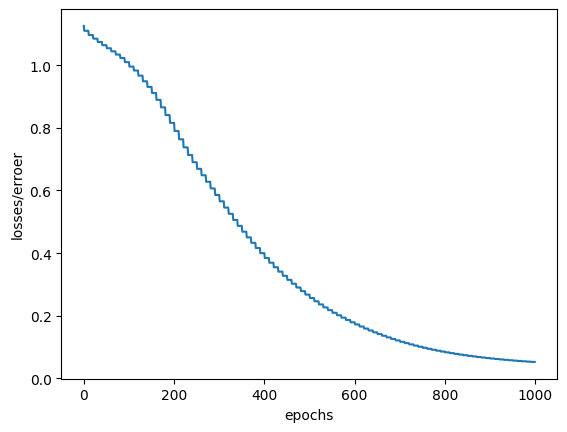

In [9]:
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module

plt.plot(range(epochs), losses)
plt.ylabel("losses/erroer")
plt.xlabel("epochs")

In [10]:
# Evaluate model on test dataset (validate model on test set)
with torch.no_grad():  # Basically turn off backpropagation
    y_eval = model.forward(x_test)  # x_test are features from our test set, y_eval will be predictions
    loss = criterion(y_eval, y_test)  # Find the loss or error
loss

tensor(0.1315)

In [ ]:
correct = 0

In [17]:
with torch.no_grad():
    correct = 0  # Initialize correct within the 'with' block
    for i, data in enumerate(x_test):
        y_val = model(data)  # or use model.forward(data)

        if y_test[i] == 0:
            x = "Setosa"
        elif y_test[i] == 1:
            x = 'Versicolor'
        else:
            x = 'Virginica'

        # This will tell us what type of lower class our network thinks it is
        print(f"{i+1}\t{y_val}\t{y_test[i]}\t{y_val.argmax().item()}")  # Corrected f-string

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f"We got {correct} correct!")

1	tensor([-5.8760,  4.4628,  6.5124])	2	2
2	tensor([-7.5436,  4.1670,  9.7255])	2	2
3	tensor([-8.4504,  5.1271, 10.1987])	2	2
4	tensor([-4.3398,  5.6267,  2.5608])	1	1
5	tensor([-7.1825,  4.8754,  8.2992])	2	2
6	tensor([-3.3974,  5.3463,  1.2803])	1	1
7	tensor([-5.9231,  4.9822,  5.9997])	2	2
8	tensor([-4.2881,  5.7003,  2.3889])	1	1
9	tensor([-6.5356,  4.9257,  7.1260])	2	2
10	tensor([-8.0509,  4.4129, 10.3286])	2	2
11	tensor([-5.6762,  4.9500,  5.6215])	2	2
12	tensor([ 4.5662, -2.2476, -2.8911])	0	0
13	tensor([ 4.2571, -1.9967, -2.7330])	0	0
14	tensor([-2.1108,  4.0515,  0.5799])	1	1
15	tensor([ 3.4575, -1.2098, -2.3514])	0	0
16	tensor([-5.4724,  5.1165,  5.0934])	2	1
17	tensor([ 4.0557, -1.7949, -2.6492])	0	0
18	tensor([-5.8075,  4.6053,  6.2458])	1	2
19	tensor([ 4.4343, -2.1392, -2.8242])	0	0
20	tensor([ 3.4528, -1.2514, -2.3660])	0	0
21	tensor([-2.6189,  4.5619,  0.8574])	1	1
22	tensor([-7.7412,  4.7377,  9.4199])	2	2
23	tensor([ 3.5744, -1.3221, -2.4135])	0	0
24	tensor([ 4.5365, 